In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt



In [2]:
def input_generator():
    input_sample=[(139,0,0), (255,0,0), (250,128,114), (255,69,0), (173,255,47),(0,255,0), (0,255,127), (32,178,170), (100,149,237), 
                  (135,206,250), (0,0,128), (0,0,255), (255,215,0), (218,165,32), (240,230,140), (255,255,0), (0,128,128), (0,255,255),
                  (64,224,208), (127,255,212), (139,0,139), (255,0,255), (255,20,147), (255,192,203)]
    output=[]
    for elements in input_sample:
        temp=[]
        for i in range(0,3):
            norm = elements[i]/255
            temp.append(norm)
        output.append(tuple(temp))
    return output 

In [3]:
input_sample = input_generator()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<function matplotlib.pyplot.show(close=None, block=None)>

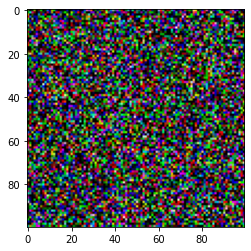

In [4]:
weights = np.random.uniform(-1,1,(100,100,3))

plt.imshow(weights)
plt.show

In [5]:
def get_winning_node(input_data,weights):
    min_distance = -1
    location = [-1,-1]
    for i in range(100):
        for j in range(100):
            distance = np.linalg.norm(input_data - weights[i][j])
            if(i == 0 and j == 0):
                min_distance = distance
                location = [i,j]
            elif(distance < min_distance):
                min_distance = distance
                location = [i,j]
    return location
def update_weights(input,winning_node,weights,sigma_k,learning_rate):
    x = winning_node[0]
    y = winning_node[1]
    sigma_k = np.round(sigma_k)
    i_start = x - int(sigma_k) if ((x - sigma_k)>=0) else 0
    i_stop = x + int(sigma_k)  if ((x + sigma_k)<=99) else 99
    j_start = y - int(sigma_k) if ((y - sigma_k)>=0) else 0
    j_stop = y + int(sigma_k)  if ((y + sigma_k)<=99) else 99
    #print(winning_node[0],winning_node[1],i_start,i_stop,j_start,j_stop)
    for i in range(j_start,j_stop+1):
        for j in range(i_start,i_stop+1):
            n_dist = np.linalg.norm(weights[x][y] - weights[i][j])
            Nc = np.exp((-n_dist**2)/(2*sigma_k**2))
            for k in range(0,3):
                weights[i][j][k] += learning_rate*Nc*(input[k] - weights[i][j][k])
            
def train(input_data,weights,alpha,sigma,epoch):
    color_out = []
    output = []
    for k in range(0,epoch):
        print("The current epoch is:",k)
        learning_rate = alpha * np.exp(-k/epoch)
        sigma_k = sigma * np.exp(-k/epoch)
        for colour in input_data:
            winning_node_location = get_winning_node(np.array(colour),weights)
            update_weights(colour,winning_node_location,weights,sigma_k,learning_rate)
            
        if k == 19 or k== 39 or k == 99 or k==149:
            output.append(weights)
            
#         if k == 39:
#             out_40_epoch = weights 
            
#         if k == 99: 
#             out_100_epoch = weights
            
#         if k == 149:
#             print("Complete")
#             out_1000_epoch = weights

#     return out_20_epoch, out_40_epoch#, out_100_epoch, out_1000_epoch
    return output


def plot(mapped,sigma):
    plot1 = plt.imshow(mapped[0])
    plot2 = plt.imshow(mapped[1])
    plot3 = plt.imshow(mapped[2])
    plot4 = plt.imshow(mapped[3])
    plt.show

In [6]:
alpha = 0.8
#sigma_list = [1, 10, 30, 50, 70]
sigma_list = [50]
color_map_20 = []
color_map_40 = []
color_map_100 = []
color_map_1000 = []
color_map_20 = train(input_sample,weights,alpha,50,150)
    #, color_map_100, color_map_1000
    
# color_map = [color_map_20, color_map_40, color_map_100, color_map_1000]
# color_map = np.asarray(color_map)
# plot(color_map,sigma)


The current epoch is: 0
The current epoch is: 1
The current epoch is: 2
The current epoch is: 3
The current epoch is: 4
The current epoch is: 5
The current epoch is: 6
The current epoch is: 7
The current epoch is: 8
The current epoch is: 9
The current epoch is: 10
The current epoch is: 11
The current epoch is: 12
The current epoch is: 13
The current epoch is: 14
The current epoch is: 15
The current epoch is: 16
The current epoch is: 17
The current epoch is: 18
The current epoch is: 19
The current epoch is: 20
The current epoch is: 21
The current epoch is: 22
The current epoch is: 23
The current epoch is: 24
The current epoch is: 25
The current epoch is: 26
The current epoch is: 27
The current epoch is: 28
The current epoch is: 29
The current epoch is: 30
The current epoch is: 31
The current epoch is: 32
The current epoch is: 33
The current epoch is: 34
The current epoch is: 35
The current epoch is: 36
The current epoch is: 37
The current epoch is: 38
The current epoch is: 39
The curren

In [18]:
temp = color_map_20[1] == color_map_20[2]
temp

array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       ...,

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,